Name: Anuraag
Reg No: 23BPS1098

# 1. Problem Statement
Predict house selling prices based on multiple property attributes using Multiple Linear Regression.

## 2. Objective of the Project
- Predict house prices using property features
- Analyze the effect of multiple factors on house prices
- Build an accurate regression model

## 3. Type of Machine Learning
- Type of Learning: Supervised Learning
- Problem Type: Regression
- Algorithm Used: Multiple Linear Regression

## 4. Dataset Description
Attributes: Area (sqft), Bedrooms, Bathrooms, Age of house, Distance from city center, Price in lakhs (target). Synthetic dataset simulates real housing data.

## 5. Dataset Generation
Dataset synthetically generated using NumPy with mathematical relationships between attributes and price; stored in CSV format.

In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)

n_samples = 100

area = np.random.randint(500, 3500, n_samples)
bedrooms = np.random.randint(1, 6, n_samples)
bathrooms = np.random.randint(1, 4, n_samples)
age = np.random.randint(0, 30, n_samples)
distance = np.round(np.random.uniform(1, 15, n_samples), 1)

price = (
    0.04 * area +
    8 * bedrooms +
    10 * bathrooms -
    0.8 * age -
    2.5 * distance +
    np.random.normal(0, 10, n_samples)
)

price = np.round(price, 1)

data = pd.DataFrame({
    "Area_sqft": area,
    "Bedrooms": bedrooms,
    "Bathrooms": bathrooms,
    "Age_of_house": age,
    "Distance_from_city": distance,
    "Price_in_Lakhs": price
})

data.to_csv("house_price_data.csv", index=False)

print("Synthetic dataset created: house_price_data.csv")
data.head()


Synthetic dataset created: house_price_data.csv


,Area_sqft,Bedrooms,Bathrooms,Age_of_house,Distance_from_city,Price_in_Lakhs
0,1360,4,1,12,2.3,84.7
1,1794,3,3,18,9.1,94.4
2,1630,3,2,21,1.5,82.4
3,1595,1,2,7,7.5,76.2
4,2138,3,1,26,8.6,82.7


In [2]:
import pandas as pd

data = pd.read_csv("house_price_data.csv")

X = data.drop("Price_in_Lakhs", axis=1)
y = data["Price_in_Lakhs"]


## 6. Data Preprocessing
- Loaded dataset from CSV
- Separated independent and dependent variables
- Split data into training and testing sets

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## 7. Model Building
Multiple Linear Regression model developed using scikit-learn. Trained with multiple independent variables to predict house prices.

In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [5]:
y_pred = model.predict(X_test)


## 8. Model Evaluation
Performance evaluated using MAE, MSE, RMSE, and R² Score.

In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)


MAE : 7.639564389497716
MSE : 94.50210648061994
RMSE: 9.721219392680116
R²  : 0.9240630303132461


## 9. Visualization
Scatter plot comparing actual house prices with predicted house prices to assess regression model accuracy.

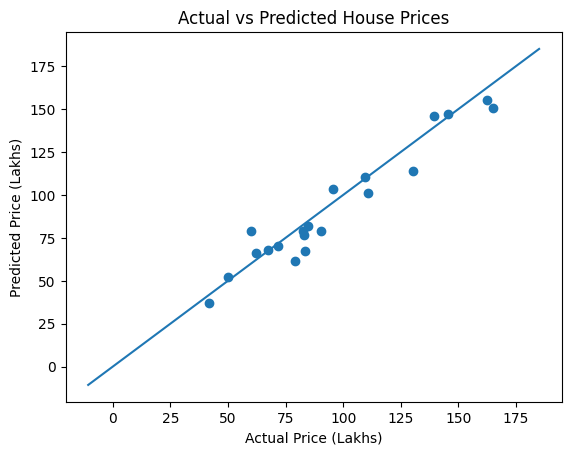

In [7]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price (Lakhs)")
plt.ylabel("Predicted Price (Lakhs)")
plt.title("Actual vs Predicted House Prices")

plt.plot(
    [y.min(), y.max()],
    [y.min(), y.max()]
)

plt.show()


In [8]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

coefficients


,Feature,Coefficient
0,Area_sqft,0.039569
1,Bedrooms,7.573604
2,Bathrooms,8.621038
3,Age_of_house,-0.802941
4,Distance_from_city,-2.301311


## 10. Conclusion
The Multiple Linear Regression model effectively predicts house prices using multiple features. Area and number of rooms have strong influence on house prices.

## 11. Future Scope
- Use real-world housing datasets
- Apply Ridge and Lasso regression
- Improve performance using feature engineering